<a href="https://colab.research.google.com/github/FelipeVillegasH/Track3/blob/main/Proyecto_Ole_Prediccion_ventas_snacks_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Snacks SKU Predictions
# Productos Ole del Ecuador
## By Felipe Villegas
### Description: By using the Stock keeping units Dataframe from the year 2021, we will predict the units to be sold by product a week for Productos Ole del Ecuador.

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [204]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [205]:
df = pd.read_excel('/content/drive/MyDrive/CodingDojo/Proyectos/ventas 2019 - 2021.xlsx')
df.head()

,Account,Type,Date,año,Num,Name,Negocio,Negocio 2,Item Description,Memo,Qty,Factor,U/M,Cantidad,Usd,dev / des,Factura,Balance
0,4100001 · ING - Ventas Salsas,Invoice,2019-01-02 00:00:00,2019,2432,INT FOOD SERVICES CORP,Salsas,Salsas,SALSA TERIYAKÍ 270G S/U,SALSA TERIYAKI 250g,14,24.0,[X24],336.0,665.28,NaN,665.28,665.28
1,4100001 · ING - Ventas Salsas,Invoice,2019-01-02 00:00:00,2019,2432,INT FOOD SERVICES CORP,Salsas,Salsas,JALAPEÑO ROJOS Y VERDES OLE 370G,JALAPEÑOS ROJOS Y VERDES 370g,1,1.0,[UNID],1.0,2.89,NaN,2.89,668.17
2,4100001 · ING - Ventas Salsas,Invoice,2019-01-02 00:00:00,2019,2433,MEGASANTAMARIA SA,Salsas,Salsas,AJÍ CON MARACUYA OLE 185G,AJI CON MARACUYÀ 185g,24,24.0,[X 24],576.0,748.80,NaN,748.80,1416.97
3,4100001 · ING - Ventas Salsas,Invoice,2019-01-02 00:00:00,2019,2433,MEGASANTAMARIA SA,Salsas,Salsas,AJÍ CON TOMATE DE ÁRBOL OLE 180G,AJÍ CON TOMATE DE ARBOL 180g,12,24.0,[X 24],288.0,374.40,NaN,374.40,1791.37
4,4100001 · ING - Ventas Salsas,Invoice,2019-01-02 00:00:00,2019,2433,MEGASANTAMARIA SA,Salsas,Salsas,JALAPEÑO ROJOS Y VERDES OLE 110G,JALAPEÑO ENCURTIDO 110g,9,24.0,[X 24],216.0,386.64,NaN,386.64,2178.01


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59693 entries, 0 to 59692
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Account           59693 non-null  object 
 1   Type              56852 non-null  object 
 2   Date              59693 non-null  object 
 3   año               59693 non-null  object 
 4   Num               59693 non-null  object 
 5   Name              59693 non-null  object 
 6   Negocio           59693 non-null  object 
 7   Negocio 2         59693 non-null  object 
 8   Item Description  59693 non-null  object 
 9   Memo              59693 non-null  object 
 10  Qty               58271 non-null  object 
 11  Factor            57810 non-null  float64
 12  U/M               50802 non-null  object 
 13  Cantidad          59693 non-null  float64
 14  Usd               57750 non-null  float64
 15  dev / des         13363 non-null  float64
 16  Factura           48273 non-null  float6

In [207]:
df['Negocio 2'].unique()

array(['Salsas', 'Snacks', 'Comercilizados', 0, 'MP'], dtype=object)

In [208]:
# Variable to Drop for having irregular and duplicated data
df['Negocio'].unique()

array(['Salsas', 'doypack', 'Packs', 'Snacks', 'Comercilizados',
       'JALAPEÑO ROJOS Y VERDES OLE 110G',
       'SALSA PICANTE JALAPEÑO OLE 165G',
       'JALAPEÑO ROJOS Y VERDES OLE 370G',
       'TOMATE DESHIDRATADO EN ACEITE OLE 225G',
       'AJÍ CON TOMATE DE ÁRBOL OLE 180G',
       'SALSA PICANTE CHIPOTLE OLE 165G',
       'TERIYAKI SALSA ASIATICA OLE 300G', 'SALSA BBQ ORIGINAL OLE 4100G',
       'JALAPEÑO ROJOS Y VERDES AGRIDULCES OLE 250G',
       'CHIMICHURRI OLE 230G', 'AJÍ CASERO OLE 165G',
       'SALSA BBQ ORIGINAL OLE 430G', 'AJÍ CON MARACUYA OLE 185G',
       'SALSA PARA SPAGHETTI RUSTICA OLE 450G',
       'SALSA BBQ ORIGINAL OLE DP 200G',
       'SALSA AJÍ ROCOTO CREMOSO OLE DP 200G', 'SALSA BBQ VINO OLE 430G',
       'SALSA AJÍ CON CHOCHOS OLE 300G', 'SALSA GUACAMOLE OLE 220G',
       'SALSA AJÍ MANABA OLE 300G',
       'SALSA PARA SPAGHETTI CLASICA OLE 450G',
       'JALAPEÑO ROJOS Y VERDES OLE 200G',
       'JALAPEÑO ROJO DESHIDRATADO FLAKES OLE 120G',
       'SAL

In [209]:
# Since we are only going to analyse the Snacks Business Unit we loc and create a new data frame to then clean it
dfSnacksFilter= df.loc[:,'Negocio 2'] == 'Snacks'

In [210]:
df = df.loc[dfSnacksFilter, :]
df.head()

,Account,Type,Date,año,Num,Name,Negocio,Negocio 2,Item Description,Memo,Qty,Factor,U/M,Cantidad,Usd,dev / des,Factura,Balance
33584,4100002 · ING - Ventas Snacks,Invoice,2019-01-03 00:00:00,2019,2448,CORPORACION FAVORITA C A,Snacks,Snacks,REDONDITO DE MAÍZ NATURAL AKÍ 150G,REDONDITOS DE MAIZ NATURAL 150g AKÍ,40,12.0,[X 12],480.0,345.60,NaN,345.60,345.60
33585,4100002 · ING - Ventas Snacks,Invoice,2019-01-03 00:00:00,2019,2448,CORPORACION FAVORITA C A,Snacks,Snacks,REDONDITO DE MAÍZ NATURAL AKÍ 300G,REDONDITOS DE MAIZ NATURAL 300g AKÍ,26,6.0,[X 6],156.0,209.04,NaN,209.04,554.64
33586,4100002 · ING - Ventas Snacks,Invoice,2019-01-03 00:00:00,2019,2448,CORPORACION FAVORITA C A,Snacks,Snacks,TRIANGULITO DE MAÍZ NATURAL AKÍ 150G,TRIANGULITOS DE MAIZ NATURAL 150g AKÍ,2,12.0,[X 12],24.0,17.28,NaN,17.28,571.92
33587,4100002 · ING - Ventas Snacks,Invoice,2019-01-03 00:00:00,2019,2448,CORPORACION FAVORITA C A,Snacks,Snacks,TRIANGULITO DE MAÍZ NATURAL AKÍ 300G,TRIANGULITOS DE MAIZ NATURAL 300g AKÍ,70,6.0,[X 6],420.0,562.80,NaN,562.80,1134.72
33588,4100002 · ING - Ventas Snacks,Invoice,2019-01-03 00:00:00,2019,2448,CORPORACION FAVORITA C A,Snacks,Snacks,REDONDITO DE MAÍZ NATURAL SMX 150G,REDONDITOS DE MAIZ NATURAL 150g SUPERMAXI,100,12.0,[X 12],1200.0,864.00,NaN,864.00,1998.72


In [211]:
df = df.loc[dfSnacksFilter, :]
df.head(50)

,Account,Type,Date,año,Num,Name,Negocio,Negocio 2,Item Description,Memo,Qty,Factor,U/M,Cantidad,Usd,dev / des,Factura,Balance
33584,4100002 · ING - Ventas Snacks,Invoice,2019-01-03 00:00:00,2019,2448,CORPORACION FAVORITA C A,Snacks,Snacks,REDONDITO DE MAÍZ NATURAL AKÍ 150G,REDONDITOS DE MAIZ NATURAL 150g AKÍ,40,12.0,[X 12],480.0,345.60,NaN,345.60,345.60
33585,4100002 · ING - Ventas Snacks,Invoice,2019-01-03 00:00:00,2019,2448,CORPORACION FAVORITA C A,Snacks,Snacks,REDONDITO DE MAÍZ NATURAL AKÍ 300G,REDONDITOS DE MAIZ NATURAL 300g AKÍ,26,6.0,[X 6],156.0,209.04,NaN,209.04,554.64
33586,4100002 · ING - Ventas Snacks,Invoice,2019-01-03 00:00:00,2019,2448,CORPORACION FAVORITA C A,Snacks,Snacks,TRIANGULITO DE MAÍZ NATURAL AKÍ 150G,TRIANGULITOS DE MAIZ NATURAL 150g AKÍ,2,12.0,[X 12],24.0,17.28,NaN,17.28,571.92
33587,4100002 · ING - Ventas Snacks,Invoice,2019-01-03 00:00:00,2019,2448,CORPORACION FAVORITA C A,Snacks,Snacks,TRIANGULITO DE MAÍZ NATURAL AKÍ 300G,TRIANGULITOS DE MAIZ NATURAL 300g AKÍ,70,6.0,[X 6],420.0,562.80,NaN,562.80,1134.72
33588,4100002 · ING - Ventas Snacks,Invoice,2019-01-03 00:00:00,2019,2448,CORPORACION FAVORITA C A,Snacks,Snacks,REDONDITO DE MAÍZ NATURAL SMX 150G,REDONDITOS DE MAIZ NATURAL 150g SUPERMAXI,100,12.0,[X 12],1200.0,864.00,NaN,864.00,1998.72
33589,4100002 · ING - Ventas Snacks,Invoice,2019-01-03 00:00:00,2019,2448,CORPORACION FAVORITA C A,Snacks,Snacks,REDONDITO DE MAÍZ NATURAL SMX 300G,REDONDITOS DE MAIZ NATURAL 300g SUPERMAXI,140,6.0,[X 6],840.0,1125.60,NaN,1125.60,3124.32
33590,4100002 · ING - Ventas Snacks,Invoice,2019-01-03 00:00:00,2019,2448,CORPORACION FAVORITA C A,Snacks,Snacks,TRIANGULITO DE MAÍZ NATURAL SMX 150G,TRIANGULITOS DE MAIZ NATURAL 150g SUPERMAXI,25,12.0,[X 12],300.0,216.00,NaN,216.00,3340.32
33591,4100002 · ING - Ventas Snacks,Invoice,2019-01-03 00:00:00,2019,2448,CORPORACION FAVORITA C A,Snacks,Snacks,TRIANGULITO DE MAÍZ NATURAL SMX 300G,TRIANGULITOS DE MAIZ NATURAL 300g SUPERMAXI,149,6.0,[X 6],894.0,1197.96,NaN,1197.96,4538.28
33592,4100002 · ING - Ventas Snacks,Invoice,2019-01-10 00:00:00,2019,2506,CORPORACION FAVORITA C A,Snacks,Snacks,REDONDITO DE MAÍZ NATURAL AKÍ 150G,REDONDITOS DE MAIZ NATURAL 150g AKÍ,10,12.0,[X 12],120.0,86.40,NaN,86.40,4624.68
33593,4100002 · ING - Ventas Snacks,Invoice,2019-01-10 00:00:00,2019,2506,CORPORACION FAVORITA C A,Snacks,Snacks,REDONDITO DE MAÍZ NATURAL AKÍ 300G,REDONDITOS DE MAIZ NATURAL 300g AKÍ,54,6.0,[X 6],324.0,434.16,NaN,434.16,5058.84


In [212]:
df.info()
# the values of Factura are the total of sales considering returns and discounts

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8771 entries, 33584 to 55481
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Account           8771 non-null   object 
 1   Type              8771 non-null   object 
 2   Date              8771 non-null   object 
 3   año               8771 non-null   object 
 4   Num               8771 non-null   object 
 5   Name              8771 non-null   object 
 6   Negocio           8771 non-null   object 
 7   Negocio 2         8771 non-null   object 
 8   Item Description  8771 non-null   object 
 9   Memo              8771 non-null   object 
 10  Qty               8575 non-null   object 
 11  Factor            8351 non-null   float64
 12  U/M               6892 non-null   object 
 13  Cantidad          8771 non-null   float64
 14  Usd               8771 non-null   float64
 15  dev / des         2215 non-null   float64
 16  Factura           6556 non-null   flo

In [213]:
# we delete the Features that are not valuable for this study
df.drop(columns = ['Type','Num','Account'], inplace = True)
# Factor and U/M are the same 

In [214]:
df.drop(columns = ['Negocio'], inplace = True)

In [215]:
# Since the Features 'Factor' and 'U/M' represent the same values we drop the variable with the less info
df['Factor'].value_counts()

1.0     4382
12.0    2901
6.0      806
30.0     141
10.0     121
Name: Factor, dtype: int64

In [216]:
df['U/M'].value_counts()

UN        2919
X12       2677
X 6        559
[X 6]      247
[X 12]     224
X30        128
X10        121
[X 30]      13
[UNI]        3
[UNID]       1
Name: U/M, dtype: int64

In [217]:
df['Qty'].value_counts()

 1.0      1677
 2.0       836
 3.0       811
 6.0       465
-1.0       456
          ... 
 103.0       1
 199.0       1
 189.0       1
 111.0       1
-531.0       1
Name: Qty, Length: 359, dtype: int64

In [218]:
df['Cantidad'].value_counts()

 12.0      1250
 0.0        784
 1.0        634
 3.0        634
 6.0        469
           ... 
 2496.0       1
 972.0        1
 100.0        1
 222.0        1
-531.0        1
Name: Cantidad, Length: 414, dtype: int64

In [219]:
df.drop(columns = ['U/M'], inplace = True)

In [220]:
df.drop(columns = ['Qty'], inplace = True)

In [221]:
df.drop(columns = ['Factor'], inplace = True)

In [222]:
df.isna().sum()
# We realize that the Qty, Factor and Cantidad Variables provide the same information and therefore could provide bias to the main objective of our study
# which is predicting the units sold for each product. Since there are missing values on every mentioned column except the 'Cantidad' we drop the rest.

Date                   0
año                    0
Name                   0
Negocio 2              0
Item Description       0
Memo                   0
Cantidad               0
Usd                    0
dev / des           6556
Factura             2215
Balance                0
dtype: int64

The other two columns 'Factura' and 'dev/desc' correspond to the values considered to calculate the balance column. Nevertheless we talked to the client who emphasized the fact that most values of the column 'dev/desc' correspond to one client and therefore the descounts and returns are registered at the end of the month. 
We proceed by filling the missing data up with cero values in order to keep the statiscical relevance of the study. 

In [223]:
df.head()

,Date,año,Name,Negocio 2,Item Description,Memo,Cantidad,Usd,dev / des,Factura,Balance
33584,2019-01-03 00:00:00,2019,CORPORACION FAVORITA C A,Snacks,REDONDITO DE MAÍZ NATURAL AKÍ 150G,REDONDITOS DE MAIZ NATURAL 150g AKÍ,480.0,345.60,NaN,345.60,345.60
33585,2019-01-03 00:00:00,2019,CORPORACION FAVORITA C A,Snacks,REDONDITO DE MAÍZ NATURAL AKÍ 300G,REDONDITOS DE MAIZ NATURAL 300g AKÍ,156.0,209.04,NaN,209.04,554.64
33586,2019-01-03 00:00:00,2019,CORPORACION FAVORITA C A,Snacks,TRIANGULITO DE MAÍZ NATURAL AKÍ 150G,TRIANGULITOS DE MAIZ NATURAL 150g AKÍ,24.0,17.28,NaN,17.28,571.92
33587,2019-01-03 00:00:00,2019,CORPORACION FAVORITA C A,Snacks,TRIANGULITO DE MAÍZ NATURAL AKÍ 300G,TRIANGULITOS DE MAIZ NATURAL 300g AKÍ,420.0,562.80,NaN,562.80,1134.72
33588,2019-01-03 00:00:00,2019,CORPORACION FAVORITA C A,Snacks,REDONDITO DE MAÍZ NATURAL SMX 150G,REDONDITOS DE MAIZ NATURAL 150g SUPERMAXI,1200.0,864.00,NaN,864.00,1998.72


In [224]:
df['Item Description'].value_counts()

TOTOPOS NATURAL OLE 300G                                   2020
TOTOPOS MICHELADA OLE 120G                                 1986
TOTOPOS QUESO RANCHERO OLE 120G                            1907
TRIANGULITO DE MAÍZ NATURAL SMX 300G                        275
REDONDITO DE MAÍZ NATURAL SMX 300G                          269
REDONDITO DE MAÍZ NATURAL SMX 150G                          265
TRIANGULITO DE MAÍZ NATURAL AKÍ 300G                        252
TRIANGULITO DE MAÍZ NATURAL SMX 150G                        240
REDONDITO DE MAÍZ NATURAL AKÍ 300G                          233
TRIANGULITO DE MAÍZ NATURAL AKÍ 150G                        229
REDONDITO DE MAÍZ NATURAL AKÍ 150G                          225
TRIANGULITO DE MAÍZ QUESO SMX 350G                          185
TRIANGULITO DE MAÍZ QUESO AKÍ 120G                          153
TRIANGULITO DE MAÍZ QUESO AKÍ 45G                           114
TRIANGULITO DE MAÍZ QUESO SMX 45G                           105
ARITOS PICANTES AKÍ 100G                

In [225]:
df['Memo'].value_counts()

TOTOPOS TORTILLA DE MAÍZ NATURAL OLÉ 300G                    1846
TOTOPOS TORTILLA DE MAÍZ MICHELADA OLÉ 120G                  1806
TOTOPOS TORTILLA DE MAÍZ RANCHERO OLÉ 120G                   1721
TOTOPOS QUESO RANCHERO OLE 120G                               182
TOTOPOS MICHELADA OLE 120G                                    176
                                                             ... 
DESCUENTO 10% TRIANGULITOS DE MAIZ NATURAL 300g SUPERMAXI       1
DESCUENTO 10% REDONDITOS DE MAIZ NATURAL 300g SUPERMAXI         1
DESCUENTO 10% REDONDITOS DE MAIZ NATURAL 150g SUPERMAXI         1
ARITOS PICANTES AKÍ 100G                                        1
TORTILLA DE MAÍZ VALUE 507 150G                                 1
Name: Memo, Length: 107, dtype: int64

In [226]:
# Style Setup
import matplotlib.pyplot as plt
!pip install mplcyberpunk
import mplcyberpunk

In [227]:
# we proceed to replace the NaN spots:
df['dev / des']=df['dev / des'].fillna(0)
df['Factura']=df['Factura'].fillna(0)

Text(0.5, 1.0, 'Correlación de Variables')

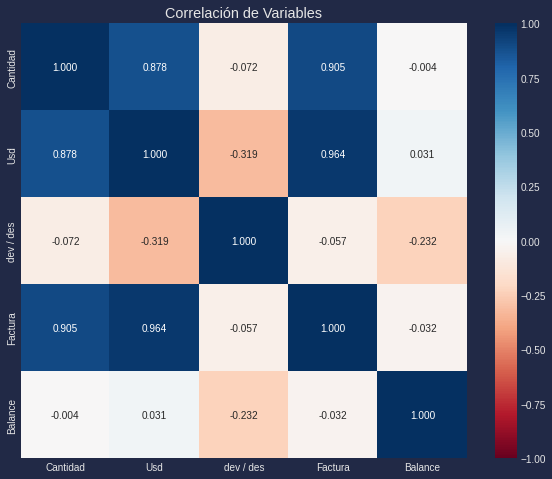

In [228]:
plt.style.use("cyberpunk")
plt.rcParams['figure.figsize'] = (10, 8)
mplcyberpunk.add_glow_effects()
sns.heatmap(df.corr(),
            cmap='RdBu',
            vmin=-1,
            annot=True, # this works to show the values in the heatmap
            fmt='.03f',
            vmax=1);
plt.title('Correlación de Variables')
# We found an strong correlation/Tendency in the interactions between Factura-Cantidad, USD-cantidad. 
# In the other Hand, we also found that there is a inverse correlation to be adressed between the balance and the dev / des, and between the dev / desc and the USD

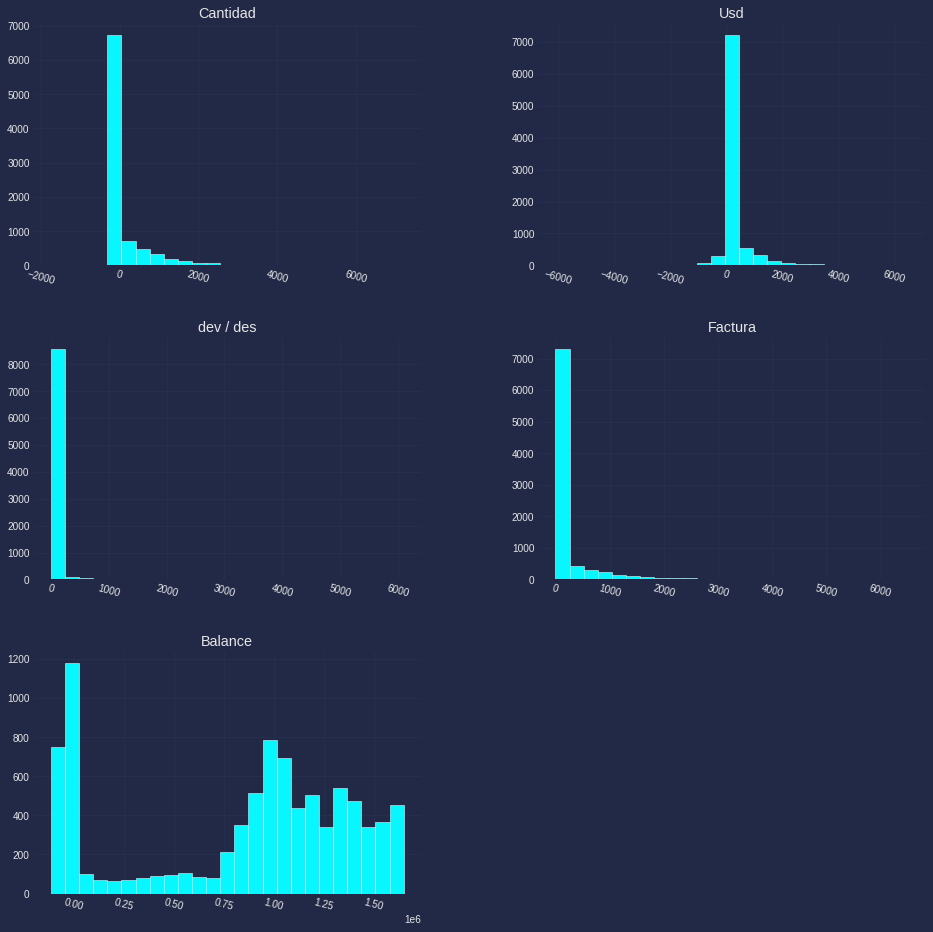

In [229]:
X = df.loc[:, ['Date',	'año',	'Name',	'Negocio 2',	'Item Description',	'Memo',	'Cantidad',	'Usd',	'dev / des',	'Factura',	'Balance']]
X.isna().sum()
X.loc[:,:].hist(bins=25,
                 figsize=(16,16),
                 xlabelsize='10',
                 ylabelsize='10',xrot=-15);
# there are not atypic values in the dataframe, the only ones to consider are the negative values corresponding to the descounts un the USD column and the returns 
# in the 'Cantidad column' we cannot drop these values due to the statictical relevance inherent to the business model of the client

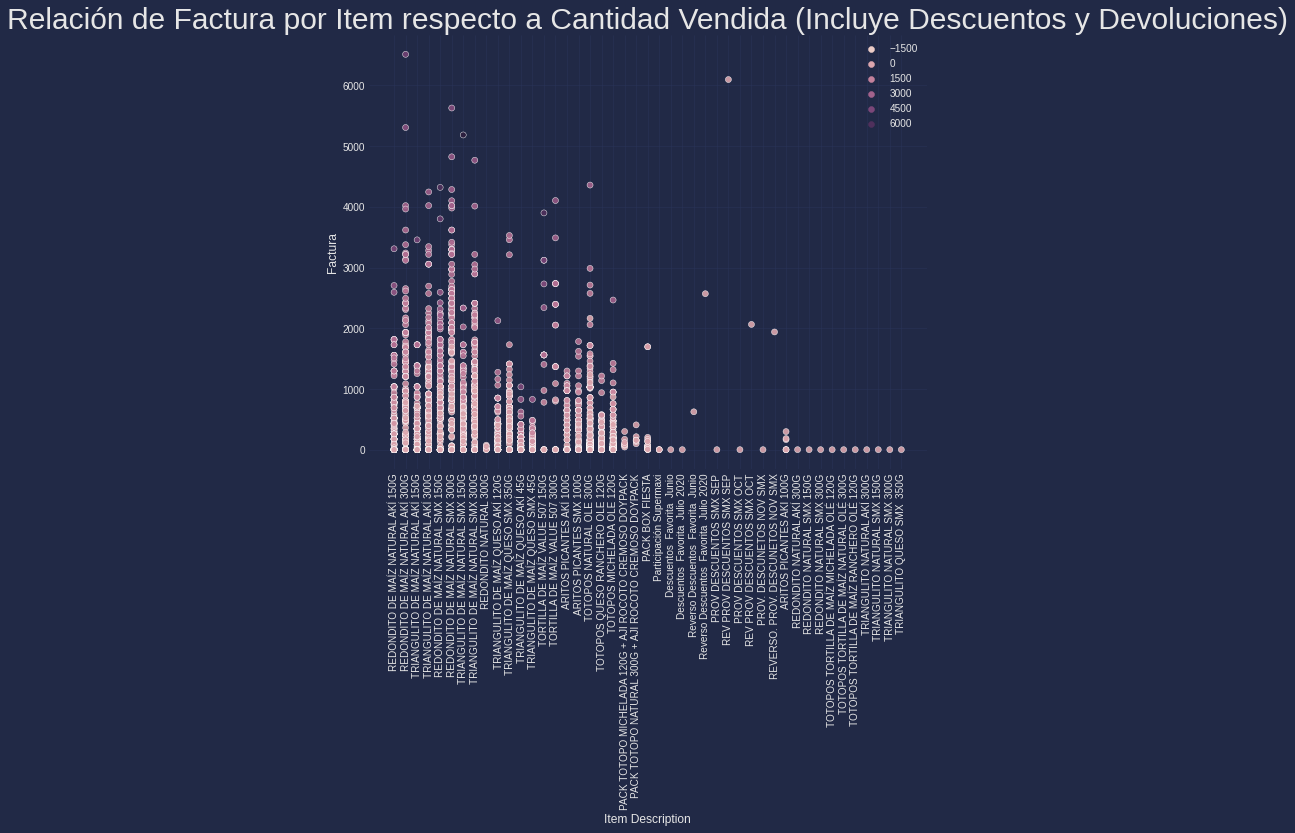

In [230]:
from seaborn.palettes import color_palette
sns.scatterplot (x = 'Item Description', y = 'Factura', hue = 'Cantidad',
                data = df,
                alpha = 0.9,
                cmap='RdBu',
               );
plt.style.use('bmh');
plt.xticks(rotation=90);
plt.title('Relación de Factura por Item respecto a Cantidad Vendida (Incluye Descuentos y Devoluciones)', fontsize = 30);
plt.legend(loc = 'upper right');

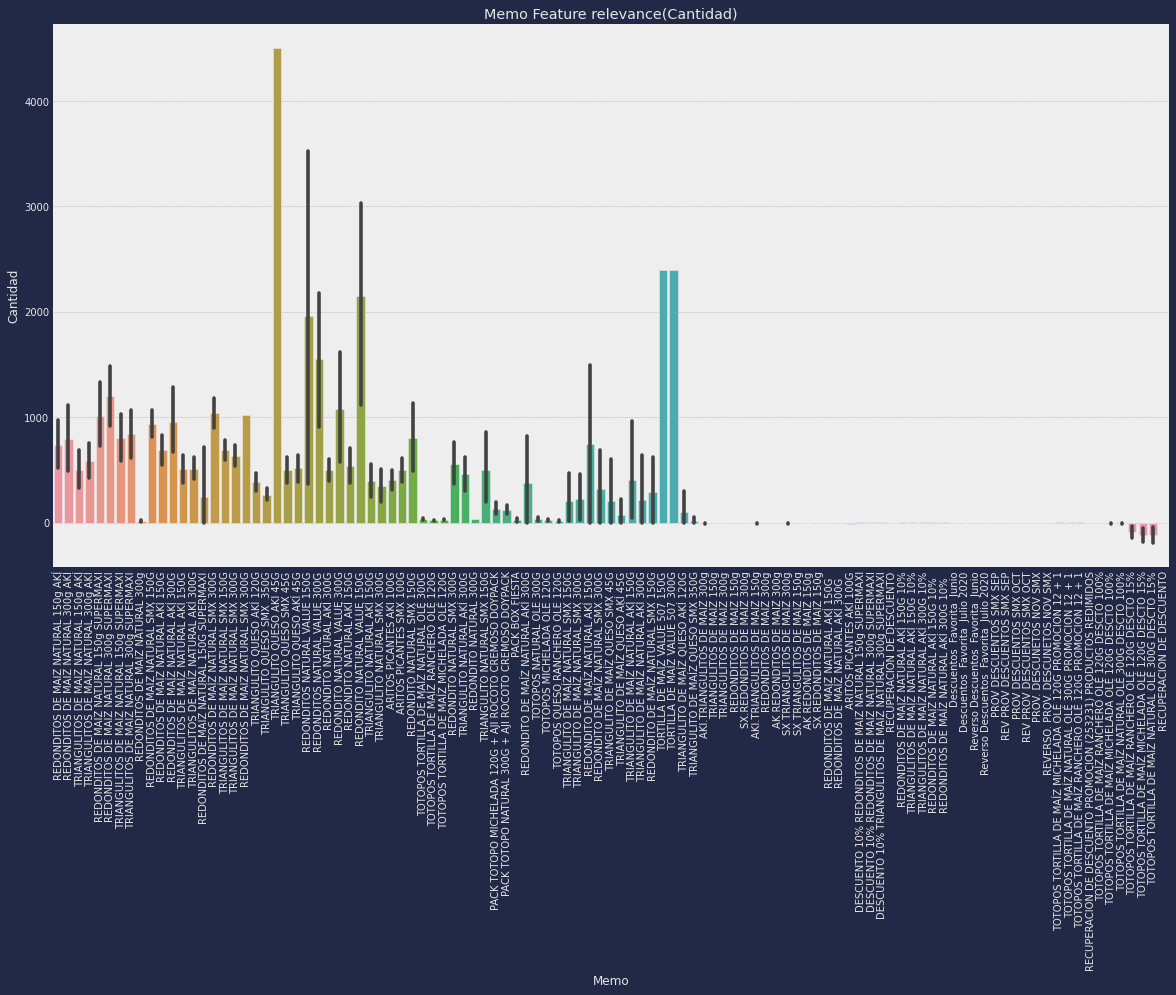

In [231]:
plt.rcParams['figure.figsize']=(20,10)
sns.barplot(x='Memo', y='Cantidad', data=df);
plt.xticks(rotation=90)
sns.set_style('ticks')
plt.title('Memo Feature relevance(Cantidad)')
plt.figsize=(30,20)
plt.xticks(rotation=90);
# la columna de memo esta mal por errores del prrograma item es directamenmte el codigo de sku 
# solo manejarse con item descriptions

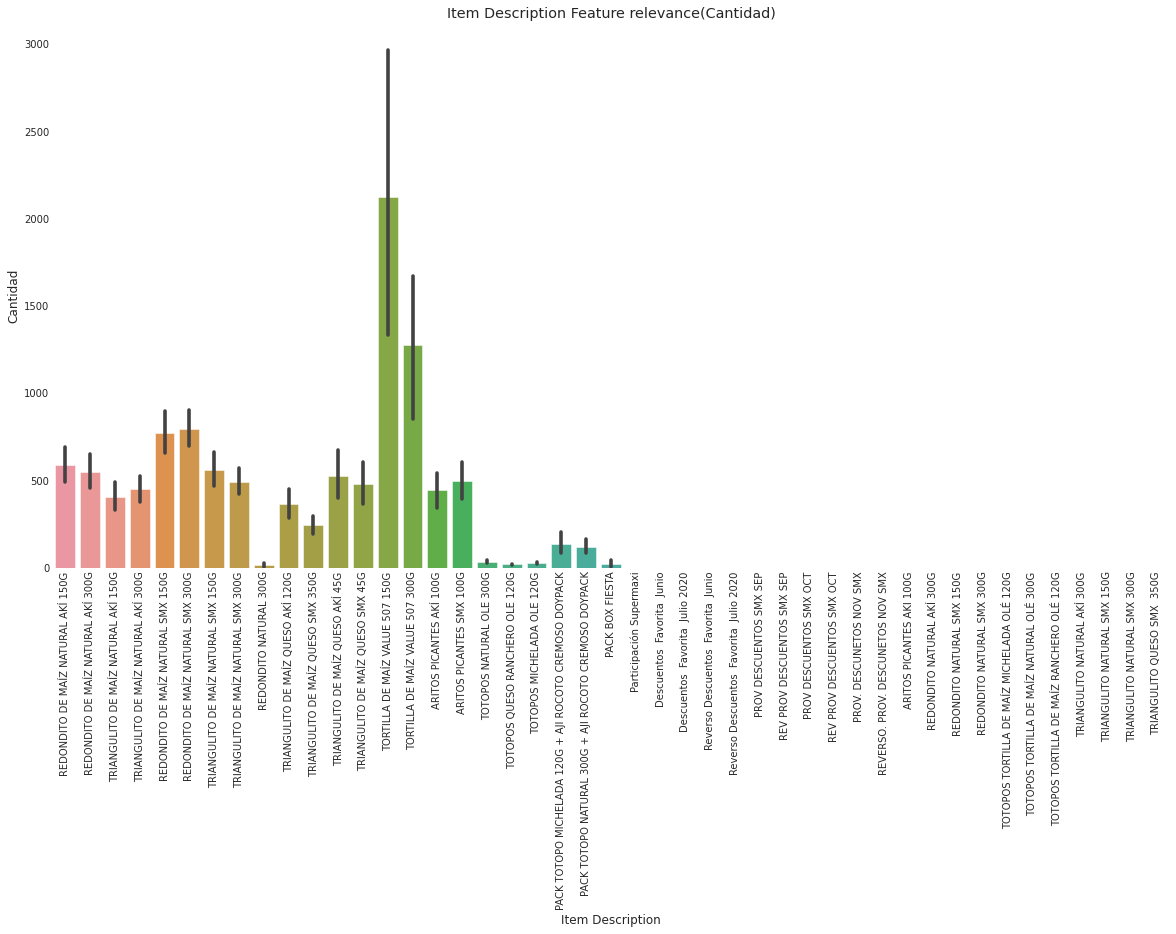

In [232]:
plt.rcParams['figure.figsize']=(20,10)
sns.barplot(x='Item Description', y='Cantidad', data=df);
plt.xticks(rotation=90)
sns.set_style('ticks')
plt.title('Item Description Feature relevance(Cantidad)')
plt.xticks(rotation=90);

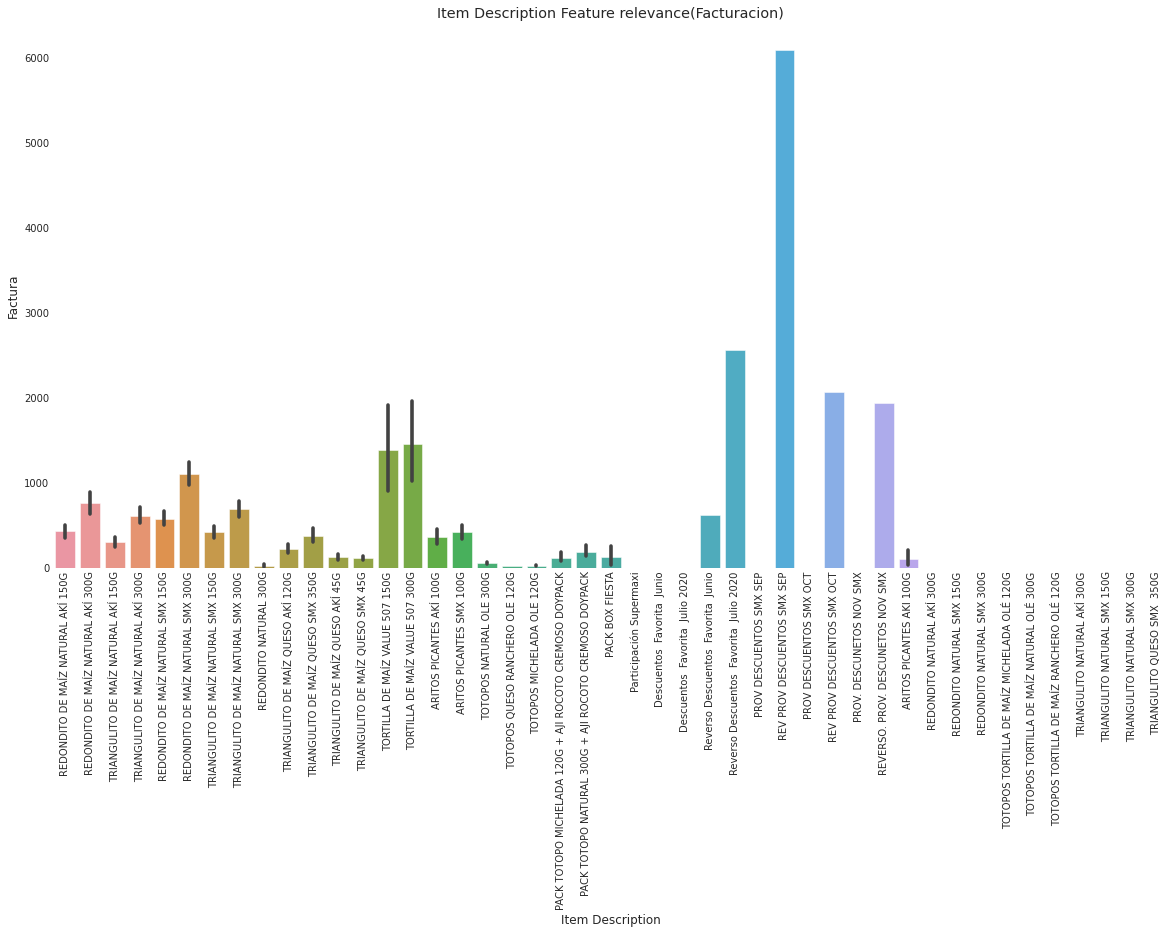

In [233]:
plt.rcParams['figure.figsize']=(20,10)
sns.barplot(x='Item Description', y='Factura', data=df);
plt.xticks(rotation=90)
sns.set_style('ticks')
plt.title('Item Description Feature relevance(Facturacion)')
plt.xticks(rotation=90);

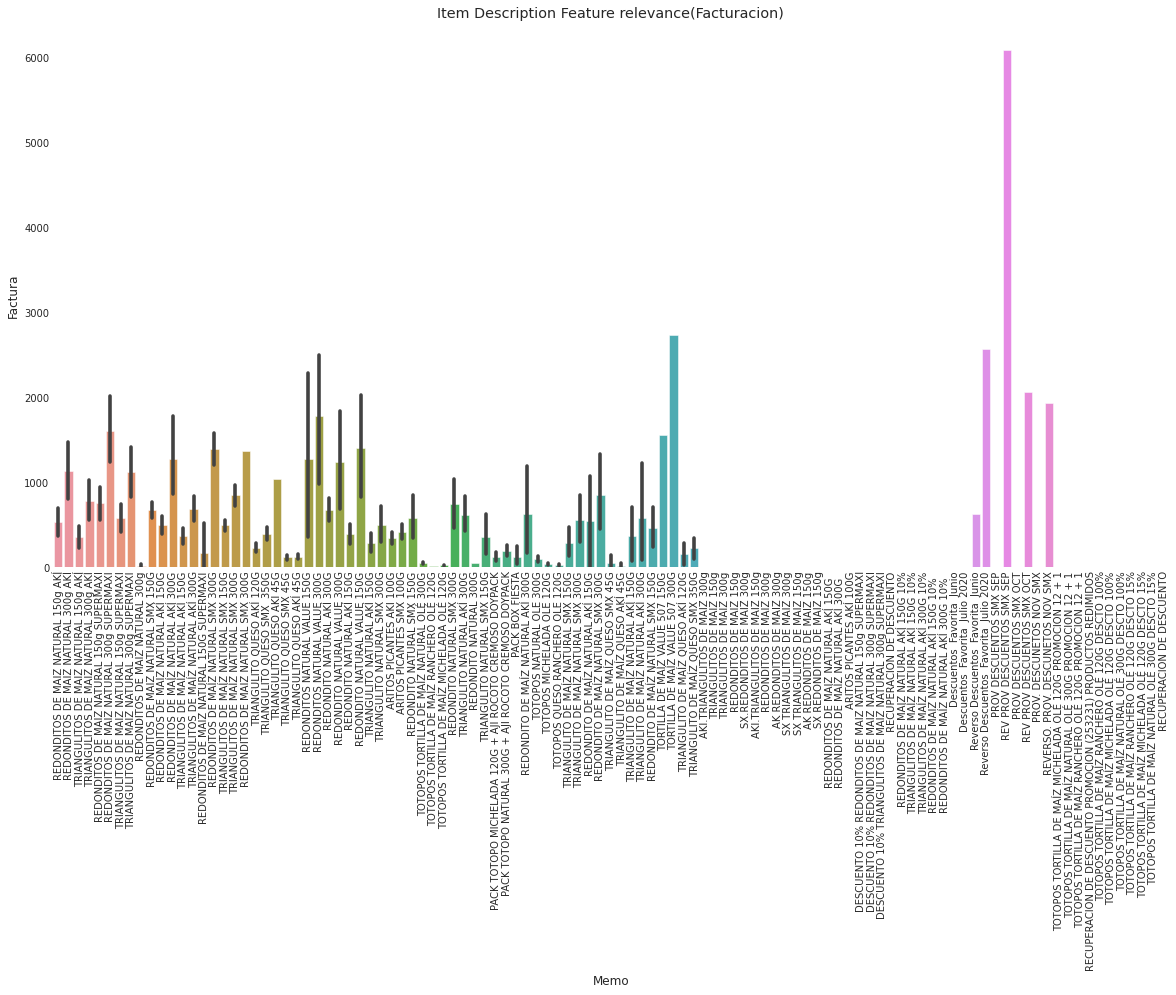

In [234]:
plt.rcParams['figure.figsize']=(20,10)
sns.barplot(x='Memo', y='Factura', data=df);
plt.xticks(rotation=90)
sns.set_style('ticks')
plt.title('Item Description Feature relevance(Facturacion)')
plt.xticks(rotation=90);

We can conclude that the product with more relevance in terms of units sold are the the Triangulitos Queso 45 gr, Nevertheless proportionally the Value products are the most representative proportionally accordinglly to the Item Feature analysis. 

Furthermore, in terms of Income the discounts in favor to the Company La Favorita in September could be considered as atypic values. 

In [235]:
# df.to_csv(path_or_buf='Nombrecsv.index = True')

After having a meeting with the client we realized that in the data are some accounts (rows) which do not have relvance for this analysis due to its accointing usage for the database. We also conclude that due to the same premise, there is also the feature memo, which we procede to delete. The last two columns deleted were so due to its coliniality 

In [236]:
df.drop(columns = ['Memo'], inplace = True)

In [237]:
df.drop(columns = ['Negocio 2'], inplace = True)

In [238]:
df.drop(columns = ['Balance'], inplace = True)

In [239]:
df.drop(columns = ['Factura'], inplace = True)

In [240]:
df.head()

,Date,año,Name,Item Description,Cantidad,Usd,dev / des
33584,2019-01-03 00:00:00,2019,CORPORACION FAVORITA C A,REDONDITO DE MAÍZ NATURAL AKÍ 150G,480.0,345.60,0.0
33585,2019-01-03 00:00:00,2019,CORPORACION FAVORITA C A,REDONDITO DE MAÍZ NATURAL AKÍ 300G,156.0,209.04,0.0
33586,2019-01-03 00:00:00,2019,CORPORACION FAVORITA C A,TRIANGULITO DE MAÍZ NATURAL AKÍ 150G,24.0,17.28,0.0
33587,2019-01-03 00:00:00,2019,CORPORACION FAVORITA C A,TRIANGULITO DE MAÍZ NATURAL AKÍ 300G,420.0,562.80,0.0
33588,2019-01-03 00:00:00,2019,CORPORACION FAVORITA C A,REDONDITO DE MAÍZ NATURAL SMX 150G,1200.0,864.00,0.0


In [241]:
dfItemfilter=df[df['Item Description'].isin(['TOTOPOS NATURAL OLE 300G', 'TOTOPOS MICHELADA OLE 120G','TOTOPOS QUESO RANCHERO OLE 120G','TRIANGULITO DE MAÍZ NATURAL SMX 300G','REDONDITO DE MAÍZ NATURAL SMX 300G','REDONDITO DE MAÍZ NATURAL SMX 150G','TRIANGULITO DE MAÍZ NATURAL AKÍ 300G','TRIANGULITO DE MAÍZ NATURAL SMX 150G','REDONDITO DE MAÍZ NATURAL AKÍ 300G','TRIANGULITO DE MAÍZ NATURAL AKÍ 150G','REDONDITO DE MAÍZ NATURAL AKÍ 150G','TRIANGULITO DE MAÍZ QUESO SMX 350G','TRIANGULITO DE MAÍZ QUESO AKÍ 120G','TRIANGULITO DE MAÍZ QUESO AKÍ 45G','TRIANGULITO DE MAÍZ QUESO SMX 45G','ARITOS PICANTES AKÍ 100G','ARITOS PICANTES SMX 100G','PACK BOX FIESTA'
,'TORTILLA DE MAÍZ VALUE 507 300G'
,'TORTILLA DE MAÍZ VALUE 507 150G'                              
,'REDONDITO NATURAL 300G'                                       
,'PACK TOTOPO MICHELADA 120G + AJI ROCOTO CREMOSO DOYPACK'       
,'PACK TOTOPO NATURAL 300G + AJI ROCOTO CREMOSO DOYPACK'         
,'ARITOS PICANTES AKI 100G'                                      
,'TRIANGULITO NATURAL SMX 300G'                                 
,'TRIANGULITO NATURAL SMX 150G'                                  
,'TRIANGULITO NATURAL AKÍ 300G'                                  
,'TOTOPOS TORTILLA DE MAÍZ RANCHERO OLÉ 120G'                    
,'TOTOPOS TORTILLA DE MAÍZ NATURAL OLÉ 300G'                     
,'TOTOPOS TORTILLA DE MAÍZ MICHELADA OLÉ 120G'                   
,'REDONDITO NATURAL SMX 300G'                                    
,'REDONDITO NATURAL SMX 150G'                                    
,'REDONDITO NATURAL AKÍ 300G'                                                                       
,'TRIANGULITO QUESO SMX  350G'])]                                     
    


In [242]:
# Transform to Numbers
df['año'].value_counts()

2021    6994
2020    1107
2019     670
Name: año, dtype: int64

In [243]:
dfItemfilter['año']=dfItemfilter['año'].apply(pd.to_numeric,errors='coerce')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [244]:
dfItemfilter['Date']=dfItemfilter['Date'].apply(pd.to_numeric,errors='coerce')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [245]:
dfItemfilter.head()

,Date,año,Name,Item Description,Cantidad,Usd,dev / des
33584,NaN,2019,CORPORACION FAVORITA C A,REDONDITO DE MAÍZ NATURAL AKÍ 150G,480.0,345.60,0.0
33585,NaN,2019,CORPORACION FAVORITA C A,REDONDITO DE MAÍZ NATURAL AKÍ 300G,156.0,209.04,0.0
33586,NaN,2019,CORPORACION FAVORITA C A,TRIANGULITO DE MAÍZ NATURAL AKÍ 150G,24.0,17.28,0.0
33587,NaN,2019,CORPORACION FAVORITA C A,TRIANGULITO DE MAÍZ NATURAL AKÍ 300G,420.0,562.80,0.0
33588,NaN,2019,CORPORACION FAVORITA C A,REDONDITO DE MAÍZ NATURAL SMX 150G,1200.0,864.00,0.0


In [246]:
dfItemfilter['Item Description'].value_counts()

TOTOPOS NATURAL OLE 300G                                   2020
TOTOPOS MICHELADA OLE 120G                                 1986
TOTOPOS QUESO RANCHERO OLE 120G                            1907
TRIANGULITO DE MAÍZ NATURAL SMX 300G                        275
REDONDITO DE MAÍZ NATURAL SMX 300G                          269
REDONDITO DE MAÍZ NATURAL SMX 150G                          265
TRIANGULITO DE MAÍZ NATURAL AKÍ 300G                        252
TRIANGULITO DE MAÍZ NATURAL SMX 150G                        240
REDONDITO DE MAÍZ NATURAL AKÍ 300G                          233
TRIANGULITO DE MAÍZ NATURAL AKÍ 150G                        229
REDONDITO DE MAÍZ NATURAL AKÍ 150G                          225
TRIANGULITO DE MAÍZ QUESO SMX 350G                          185
TRIANGULITO DE MAÍZ QUESO AKÍ 120G                          153
TRIANGULITO DE MAÍZ QUESO AKÍ 45G                           114
TRIANGULITO DE MAÍZ QUESO SMX 45G                           105
ARITOS PICANTES AKÍ 100G                

In [247]:
dfItemfilter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8758 entries, 33584 to 55481
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              0 non-null      float64
 1   año               8758 non-null   int64  
 2   Name              8758 non-null   object 
 3   Item Description  8758 non-null   object 
 4   Cantidad          8758 non-null   float64
 5   Usd               8758 non-null   float64
 6   dev / des         8758 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 547.4+ KB


In [248]:
dfItemfilter.head()

,Date,año,Name,Item Description,Cantidad,Usd,dev / des
33584,NaN,2019,CORPORACION FAVORITA C A,REDONDITO DE MAÍZ NATURAL AKÍ 150G,480.0,345.60,0.0
33585,NaN,2019,CORPORACION FAVORITA C A,REDONDITO DE MAÍZ NATURAL AKÍ 300G,156.0,209.04,0.0
33586,NaN,2019,CORPORACION FAVORITA C A,TRIANGULITO DE MAÍZ NATURAL AKÍ 150G,24.0,17.28,0.0
33587,NaN,2019,CORPORACION FAVORITA C A,TRIANGULITO DE MAÍZ NATURAL AKÍ 300G,420.0,562.80,0.0
33588,NaN,2019,CORPORACION FAVORITA C A,REDONDITO DE MAÍZ NATURAL SMX 150G,1200.0,864.00,0.0


In [249]:
dfItemfilter.drop(columns = ['Date'])

,año,Name,Item Description,Cantidad,Usd,dev / des
33584,2019,CORPORACION FAVORITA C A,REDONDITO DE MAÍZ NATURAL AKÍ 150G,480.0,345.60,0.00
33585,2019,CORPORACION FAVORITA C A,REDONDITO DE MAÍZ NATURAL AKÍ 300G,156.0,209.04,0.00
33586,2019,CORPORACION FAVORITA C A,TRIANGULITO DE MAÍZ NATURAL AKÍ 150G,24.0,17.28,0.00
33587,2019,CORPORACION FAVORITA C A,TRIANGULITO DE MAÍZ NATURAL AKÍ 300G,420.0,562.80,0.00
33588,2019,CORPORACION FAVORITA C A,REDONDITO DE MAÍZ NATURAL SMX 150G,1200.0,864.00,0.00
...,...,...,...,...,...,...
55477,2021,SUPERMERCADOS AL DIA SUPERALDIA S.A.,TOTOPOS MICHELADA OLE 120G,1.0,-2.09,2.09
55478,2021,SUPERMERCADOS AL DIA SUPERALDIA S.A.,TOTOPOS QUESO RANCHERO OLE 120G,1.0,-2.09,2.09
55479,2021,CORPORACION EL ROSADO S.A.,TOTOPOS NATURAL OLE 300G,1.0,-35.80,35.80
55480,2021,CORPORACION EL ROSADO S.A.,TOTOPOS NATURAL OLE 300G,1.0,-3.58,3.58


In [250]:
dfItemfilter = pd.get_dummies(dfItemfilter, columns = ['Name'])

In [251]:
dfItemfilter = pd.get_dummies(dfItemfilter, columns = ['Item Description'])

In [252]:
dfItemfilter.head()

,Date,año,Cantidad,Usd,dev / des,Name_AGUILAR HERRERA HUGO PAUL,Name_ANDRADE ACOSTA MIRYAN RAQUEL,Name_ARRATA MENA ESTEFANIA,Name_B&G MARKET B&GMARKET S.A.S.,Name_BRAVO ALCIVAR JEFFERSON FABRICIO,...,Item Description_TRIANGULITO DE MAÍZ NATURAL SMX 150G,Item Description_TRIANGULITO DE MAÍZ NATURAL SMX 300G,Item Description_TRIANGULITO DE MAÍZ QUESO AKÍ 120G,Item Description_TRIANGULITO DE MAÍZ QUESO AKÍ 45G,Item Description_TRIANGULITO DE MAÍZ QUESO SMX 350G,Item Description_TRIANGULITO DE MAÍZ QUESO SMX 45G,Item Description_TRIANGULITO NATURAL AKÍ 300G,Item Description_TRIANGULITO NATURAL SMX 150G,Item Description_TRIANGULITO NATURAL SMX 300G,Item Description_TRIANGULITO QUESO SMX 350G
33584,NaN,2019,480.0,345.60,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33585,NaN,2019,156.0,209.04,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33586,NaN,2019,24.0,17.28,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33587,NaN,2019,420.0,562.80,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33588,NaN,2019,1200.0,864.00,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [253]:
dfItemfilter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8758 entries, 33584 to 55481
Columns: 112 entries, Date to Item Description_TRIANGULITO QUESO SMX  350G
dtypes: float64(4), int64(1), uint8(107)
memory usage: 1.3 MB


Predictions

In [254]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [255]:
X = dfItemfilter.drop(columns = ['Date','Cantidad'])
X.shape

(8758, 110)

In [256]:
y = dfItemfilter.loc[:, 'Cantidad']
y.shape

(8758,)

In [257]:
np.any(np.isnan(X))
np.all(np.isfinite(X))

True

In [258]:
def clean_dataset(dfItemfilter):
    assert isinstance(dfItemfilter, pd.DataFrame), "df needs to be a pd.DataFrame"
    dfItemfilter.dropna(inplace=True)
    indices_to_keep = ~dfItemfilter.isin([np.nan, np.inf, -np.inf]).any(1)
    return dfItemfilter[indices_to_keep].astype(np.float64)
dfItemfilter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8758 entries, 33584 to 55481
Columns: 112 entries, Date to Item Description_TRIANGULITO QUESO SMX  350G
dtypes: float64(4), int64(1), uint8(107)
memory usage: 1.3 MB


In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3)

In [260]:
Random_Forest = RandomForestRegressor(n_estimators=1)
Random_Forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1)

In [261]:
Random_Forest.score(X_train, y_train)

0.9662877954246648

In [262]:
Random_Forest.score(X_test, y_test)

0.915122563589364

Null Model

In [263]:
pd.DataFrame(y_train).value_counts(normalize=True)

Cantidad
 12.0       0.143118
 0.0        0.086328
 3.0        0.072473
 1.0        0.072320
 6.0        0.055572
              ...   
 1212.0     0.000152
 1224.0     0.000152
 1236.0     0.000152
 1260.0     0.000152
-1740.0     0.000152
Length: 366, dtype: float64

In [264]:
estimator_range = [1] + list(range(10, 310, 10))
estimator_range

[1,
 10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190,
 200,
 210,
 220,
 230,
 240,
 250,
 260,
 270,
 280,
 290,
 300]

In [265]:
clf = RandomForestRegressor(n_estimators=100,
                                 random_state=1,
                                 bootstrap=True)
# Lista para almacenar las precisiones promedio para cada valor de n_estimators:
scores = []
# Use la división entrenamiento prueba con cada valor de n_estimators (Advertencia: ¡Lento!)
for estimator in estimator_range:
    clf = RandomForestRegressor(n_estimators=estimator,
                                 random_state=1,
                                 bootstrap=True)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

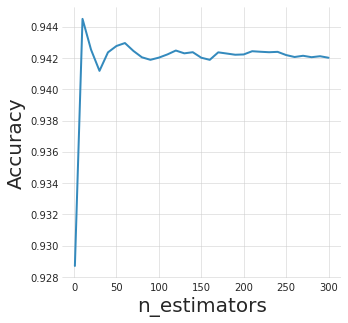

In [266]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5));
axes.plot(estimator_range, scores);
axes.set_xlabel('n_estimators', fontsize =20);
axes.set_ylabel('Accuracy', fontsize = 20);
axes.grid()

In [267]:
Bestimator = pd.DataFrame(scores)
Bestimator = Bestimator.set_axis(['scores'], axis=1, inplace=False)
Bestimator

,scores
0,0.928695
1,0.944506
2,0.942541
3,0.941178
4,0.942361
5,0.942769
6,0.942958
7,0.942454
8,0.942047
9,0.941885


In [268]:
Bestimator.sort_values(by='scores', ascending=False, inplace= True)
Bestimator

,scores
1,0.944506
6,0.942958
5,0.942769
2,0.942541
12,0.942479
7,0.942454
21,0.942435
22,0.942400
24,0.942395
14,0.942372


In [269]:
estimator_range[:20]

[1,
 10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190]

In [270]:
Features = pd.DataFrame({'Feature': X_train.columns, 'Importance': Random_Forest.feature_importances_})
Features.sort_values(by = 'Importance', inplace = True)

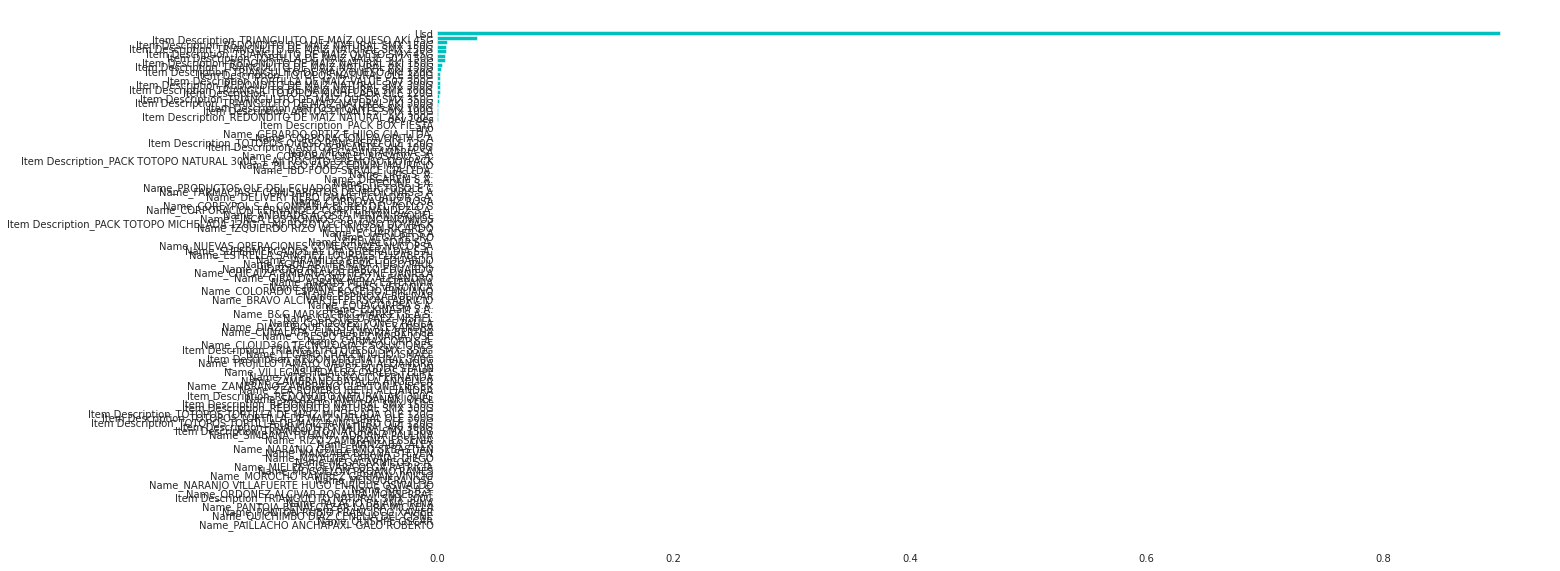

In [278]:
plt.barh(Features['Feature'], 
         Features['Importance'],
         color='c',
         ecolor= 'k'
         );

KNN

In [272]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
# Transform 
X = scaler.transform(X);

In [273]:
# We assign the KNN model to a variable
Knn = KNeighborsRegressor(n_neighbors=5)
print(Knn)

KNeighborsRegressor()


In [274]:
Knn.fit(X_train, y_train)

KNeighborsRegressor()

In [275]:
score = Knn.score(X_train, y_train)
score

0.917792465589473

In [276]:
score2 = Knn.score(X_test, y_test)
score2

0.8588132923491315

As soon as we applied the Dummies method to the Categorical variables corresponding to the suppliers and the product names, we improved the models and reduced the overfit